In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Model Accuracy: 0.92


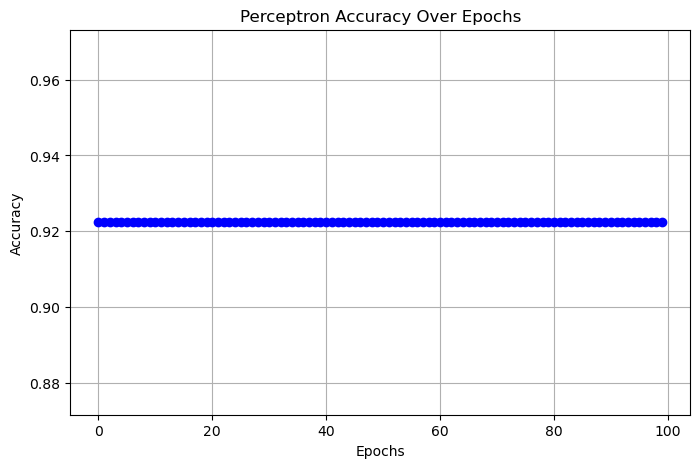

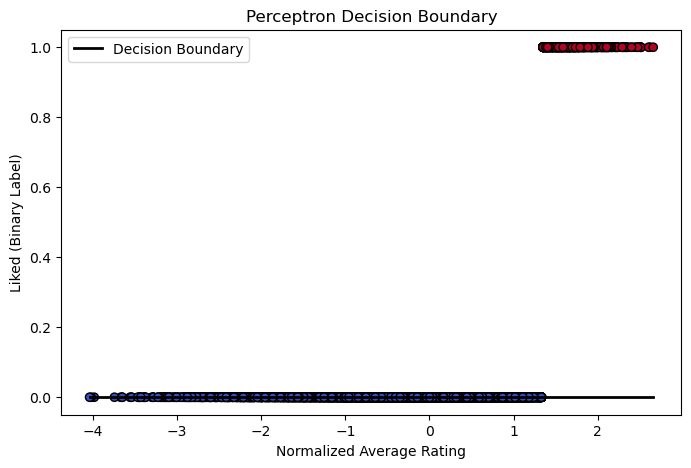

In [46]:
# Load dataset
df = pd.read_csv("Movie_Data_File.csv")

# Define labels
df['Liked'] = (df['Average_rating'] >= 4.0).astype(int)

# Normalize features
df['Average_rating'] = (df['Average_rating'] - df['Average_rating'].mean()) / df['Average_rating'].std()

# Perceptron Model
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = np.random.uniform(-0.01, 0.01)
        self.accuracy_history = []

    def train(self, X, y):
        self.weights = np.zeros(X.shape[1])
        for epoch in range(self.epochs):
            predictions = self.predict(X)
            errors = y - predictions
            self.weights += self.learning_rate * np.dot(errors, X) / len(X)
            self.bias += self.learning_rate * np.mean(errors)
            acc = np.mean(predictions == y)
            self.accuracy_history.append(acc)

    def predict(self, X):
        return np.where(np.dot(X, self.weights) + self.bias >= 0, 1, 0)

# Prepare data
features = df[['Average_rating']].values
labels = df['Liked'].values

# Train model
model = Perceptron()
model.train(features, labels)

# Test on sample data
predictions = model.predict(features)
accuracy = np.mean(predictions == labels)
print(f"Model Accuracy: {accuracy:.2f}")

# Plot Accuracy Over Epochs
plt.figure(figsize=(8, 5))
plt.plot(range(model.epochs), model.accuracy_history, marker='o', linestyle='-', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Perceptron Accuracy Over Epochs')
plt.grid(True)
plt.show()

# Plot Decision Boundary
plt.figure(figsize=(8, 5))
plt.scatter(df['Average_rating'], df['Liked'], c=df['Liked'], cmap='coolwarm', edgecolors='k')
x_vals = np.linspace(df['Average_rating'].min(), df['Average_rating'].max(), 100)
y_vals = np.where(x_vals * model.weights[0] + model.bias >= 0, 1, 0)
plt.plot(x_vals, y_vals, color='black', linewidth=2, label='Decision Boundary')
plt.xlabel('Normalized Average Rating')
plt.ylabel('Liked (Binary Label)')
plt.title('Perceptron Decision Boundary')
plt.legend()
plt.show()